In [792]:
import torch
from torch import nn

# Check PyTorch version
torch.__version__

'2.3.1+cu121'

In [793]:
# Creating *known* parameters
weight = 0.7
bias = 0.3

# Creating data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [794]:
# The len of X and y
len(X), len(y)

(50, 50)

In [795]:
# Making the train and test data split now

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [796]:
import matplotlib.pyplot as plt

In [797]:
# Creating the plot for Training data, Testing data and Predictions

def plot_prediction(
                    train_data = X_train,
                    train_labels = y_train,
                    test_data= X_test,
                    test_label= y_test,
                    prediction = None
                    ):
    """
    Plot the training data, test data and compares predictions
    """
    plt.figure(figsize=(9,5))
    #Plotting the training data
    plt.scatter(train_data, train_labels, c='b', s=10, label="Training Data")
    
    #Plotting the training data
    plt.scatter(test_data, test_label, c='g', s=20, label="Testing Data")
    
    if prediction is not None:
        plt.scatter(test_data, prediction, c='r', s=10, label="Predictions")
    
    plt.title('Training vs Testing Dataset')
    plt.xlabel('X Data')
    plt.ylabel('Y Data')
    plt.legend(prop={"size": 14});
    plt.show()

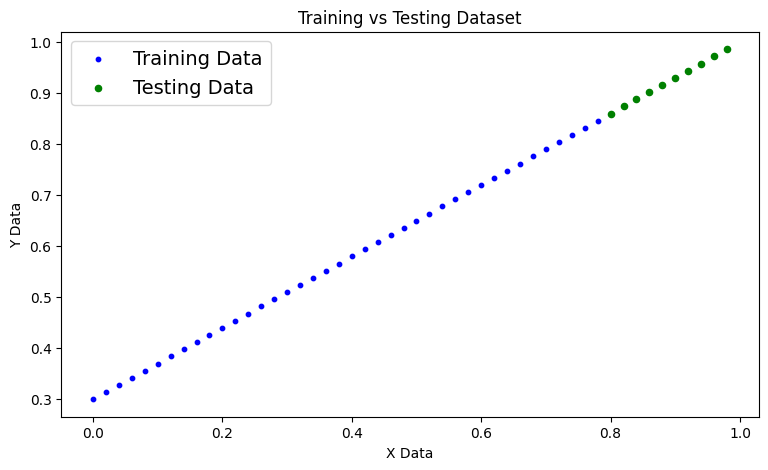

In [798]:
plot_prediction()

In [799]:
# Building the Pytorch model
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [800]:
torch.manual_seed(42)

# Creating the instance/object for the LinearRegression Model
model_0 = LinearRegressionModel()

# Checking the nn.Parameter(s) within the nn.Module subclass we created
parameters = list(model_0.parameters())

# The parameters here are wieght and biases we randomly assigned
print(parameters)

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [801]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [802]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

In [803]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


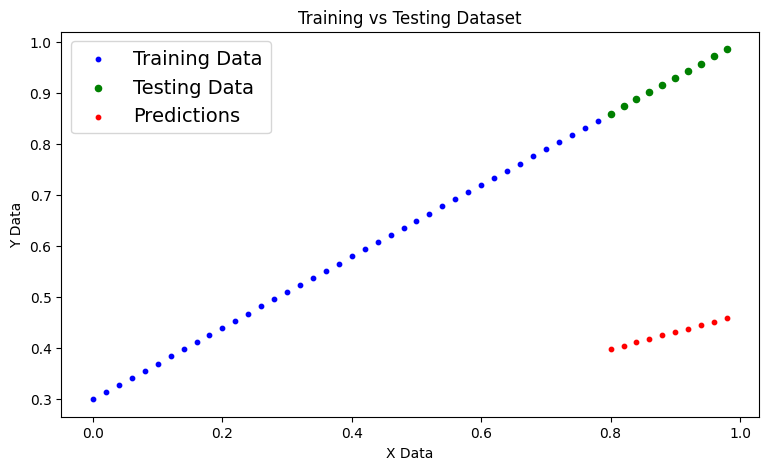

In [804]:
plot_prediction(prediction=y_preds)

In [805]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [806]:
## Trainig the Model to fit the prediciton point to test_data points 

# Creating the loss function
loss_fn = nn.L1Loss()

# Creating the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001)

## Extras:


In [807]:
import numpy as np

def gradient_descent(
    gradient, start, learn_rate, n_iter=10, tolerance=1e-06
):
    gradients = [start]
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        gradients.append(vector)
        
    return vector, gradients

In [808]:
input_values = np.linspace(-3, 3, 100)

fxn_values = np.power(input_values, 4) - 5 * np.power(input_values, 2) - 3 * input_values
final_grad, gradients = gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start=0, learn_rate=0.1)

In [809]:
gradients = np.array(gradients)
grad_fxn_values = np.power(gradients, 4) - 5 * np.power(gradients, 2) - 3 * gradients

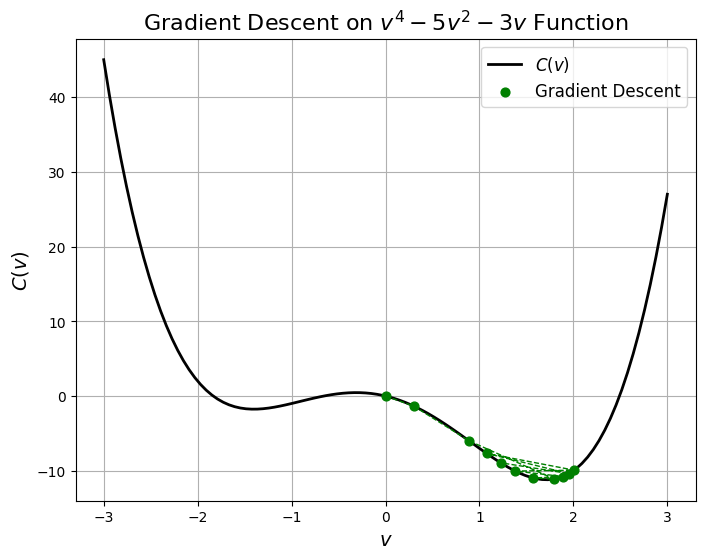

In [810]:
plt.figure(figsize=(8, 6))
plt.plot(input_values, fxn_values, 'k', label='$C(v)$', linewidth=2)
plt.scatter(gradients, grad_fxn_values, color='green', s=40, zorder=5, label='Gradient Descent') 
plt.plot(gradients, grad_fxn_values, 'green', linestyle='--', linewidth=1)
plt.title('Gradient Descent on $v^4 - 5v^2 - 3v$ Function', fontsize=16)
plt.xlabel('$v$', fontsize=14)
plt.ylabel('$C(v)$', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [811]:
np.random.seed(5)

def one_hot(Y):
    one_hot_y = np.zeros((Y.size, Y.max()+1))
    one_hot_y[np.arange(Y.size), Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

Y = np.random.randint(1, 10, size=(10,1)).T
print(one_hot(Y))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [812]:
torch.manual_seed(42)

epochs = 2000

#Tracking the different values ot training and testing
epoch_count = []
train_loss_list = []
test_loss_list = []

# Looping through the dataq for training
for epoch in range(epochs):
    # setting the model in train mode
    model_0.train() # train_mode in pytorch set all the parameters that require gradient to requires gradients
    
    # 1. Forward Pass
    y_pred = model_0(X_train)
    
    # 2. Calculating the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Performs the back propagation on loss w.r.t parameters of model
    loss.backward()
    
    # 5. Step the optimizer(gradient descent)
    optimizer.step()
    
    # For Testing
    model_0.eval() # turn off the different setting which isn't neede during testing like (deopour and normalization layers)
    
    # The testing process
    with torch.inference_mode(): # turn off the gradint tracking and few more things, this is similar to torch.no_grad()
        
        # 1. Forward Pass
        test_pred = model_0(X_test)
        
        # 2. Calculating the loss
        test_loss = loss_fn(test_pred, y_test)
        
    # Printing out the training and testing loss for every 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        
        epoch_count.append(epoch)
        train_loss_list.append(loss)
        test_loss_list.append(test_loss)
        
        # epoch_count[epoch] = {
        #     'training_loss': loss.item(),  
        #     'testing_loss': test_loss.item()    
        # }
        
        # Printing out the model_state_dict or parameters of model
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch: 10 | Loss: 0.3013603389263153 | Test Loss: 0.4797181189060211
OrderedDict([('weights', tensor([0.3410])), ('bias', tensor([0.1398]))])
Epoch: 20 | Loss: 0.28983938694000244 | Test Loss: 0.4662471413612366
OrderedDict([('weights', tensor([0.3449])), ('bias', tensor([0.1498]))])
Epoch: 30 | Loss: 0.2783183455467224 | Test Loss: 0.4527761936187744
OrderedDict([('weights', tensor([0.3488])), ('bias', tensor([0.1598]))])
Epoch: 40 | Loss: 0.26679736375808716 | Test Loss: 0.43930521607398987
OrderedDict([('weights', tensor([0.3527])), ('bias', tensor([0.1698]))])
Epoch: 50 | Loss: 0.2552763819694519 | Test Loss: 0.4258342385292053
OrderedDict([('weights', tensor([0.3566])), ('bias', tensor([0.1798]))])
Epoch: 60 | Loss: 0.24375538527965546 | Test Loss: 0.41236335039138794
OrderedDict([('weights', tensor([0.3605])), ('bias', tensor([0.1898]))])
E

In [813]:
# print(epoch_count)
train_loss_list = np.array(torch.tensor(train_loss_list).numpy())
test_loss_list = np.array(torch.tensor(test_loss_list).numpy())
epoch_count = np.array(epoch_count)

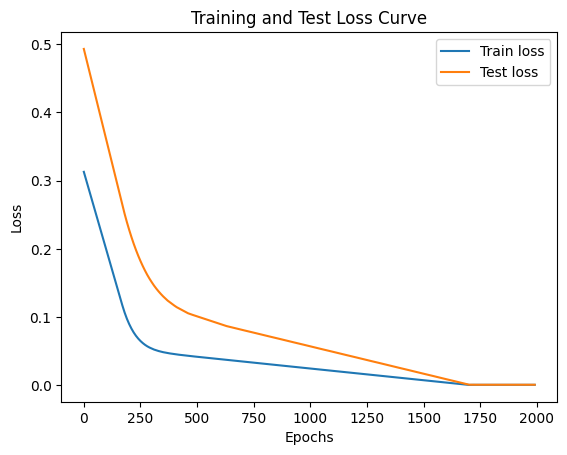

In [814]:
plt.plot(epoch_count, train_loss_list, label = "Train loss")
plt.plot(epoch_count, test_loss_list, label = "Test loss")
plt.title("Training and Test Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [815]:
weight, bias

(0.7, 0.3)

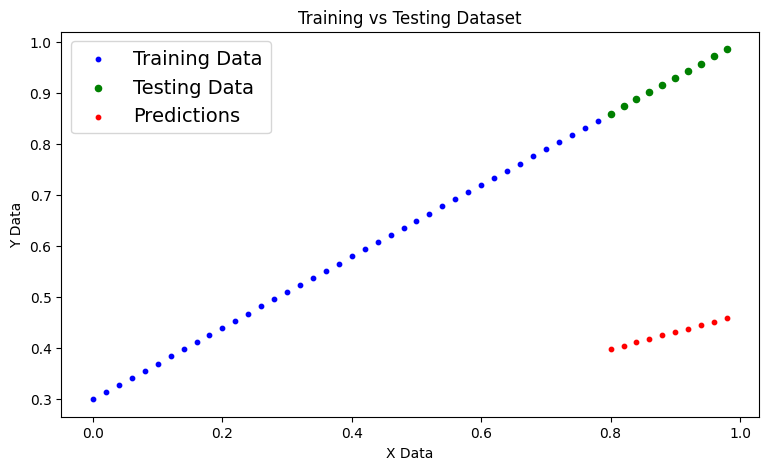

In [816]:
# Random prediciton which we intialized randomly

plot_prediction(prediction=y_preds)

In [817]:
# Using the trained model for infernce to create Y_prediction

with torch.inference_mode():
    y_pred_now = model_0(X_test)

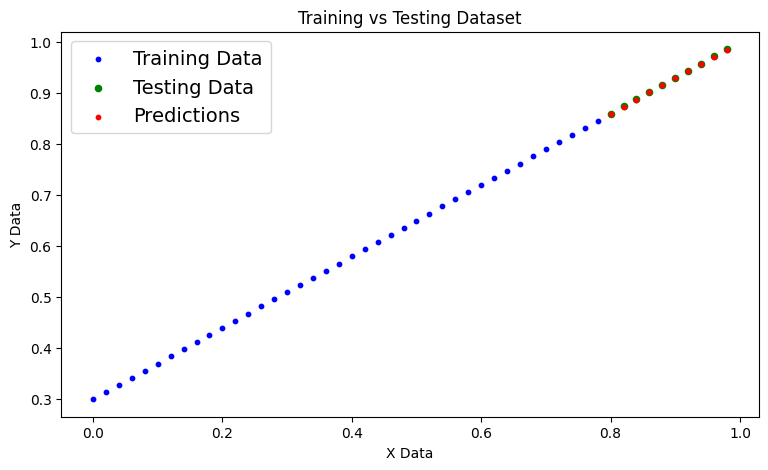

In [818]:
# Plotting the Prediciton in Test_data, Test_data and new Prediciton done from trained model

plot_prediction(prediction=y_pred_now)

In [819]:
model_0

LinearRegressionModel()

In [820]:
# Saving the Pytorch Model (trained model)
from pathlib import Path

# Creatung a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Creating model save path
MODEL_NAME = "O1_pytorch_workflow_test_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Saving the model's state dict (Recommended by the Pytorch)
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to: models/O1_pytorch_workflow_test_model.pth


In [821]:
import os

# Getting the size of the model size i.e model.save_dict()

file_path = MODEL_SAVE_PATH  
file_size = os.path.getsize(file_path)

print(f"Model Size: {file_size/1024:.2f} MB")

Model Size: 1.66 MB


In [822]:
# Getting the size of the model parameters i.e weights and biases

# p.numel() gives the number of elements in the parameter p.
# p.element_size() gives the size of each element in bytes.
# Summing up all parameter size gives us the total size of the model's parameter

total_params_size_bytes = sum(params.numel() * params.element_size() for params in model_0.parameters())

print(f"Total size of model parameters: {total_params_size_bytes} bytes")

Total size of model parameters: 8 bytes


In [823]:
# Loadin the Pytorch model

# Instantiating a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()
print(loaded_model_0.state_dict())

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


<All keys matched successfully>

In [824]:
# The loaded model after we load the state_dict() of previous trained model i.e model_0
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [825]:
# Testing if the loaded_model is similar or equal to the trained model i.e model_0
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_y_preds = loaded_model_0(X_test)
loaded_model_y_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [826]:
# Since we already predicted the model for X_test data from the model_0 we can print out the y_pred_now (Y prediction)
y_pred_now

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [827]:
# Checking if the model we loaded has same prediction as the trained_model i.e model_0
y_pred_now == loaded_model_y_preds

# So the loaded_model is similar/same as the trained_model(model_0)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 1. Putting all the things together

In [828]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Checking the Pytorch version
torch.__version__

'2.3.1+cu121'

In [829]:
# Creating a device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

### 1.1 Data

In [830]:
# Creating the data using the linear regression formula y = weight * X + bias

weight = 0.8 
bias = 0.3

# Creating range values
start = 0
end = 1
steps = 0.02

# Creating X and Y values (features and labels)
X = torch.arange(start, end, step=steps).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3160],
         [0.3320],
         [0.3480],
         [0.3640],
         [0.3800],
         [0.3960],
         [0.4120],
         [0.4280],
         [0.4440]]))

In [831]:
# spliting the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 40, Test size: 10


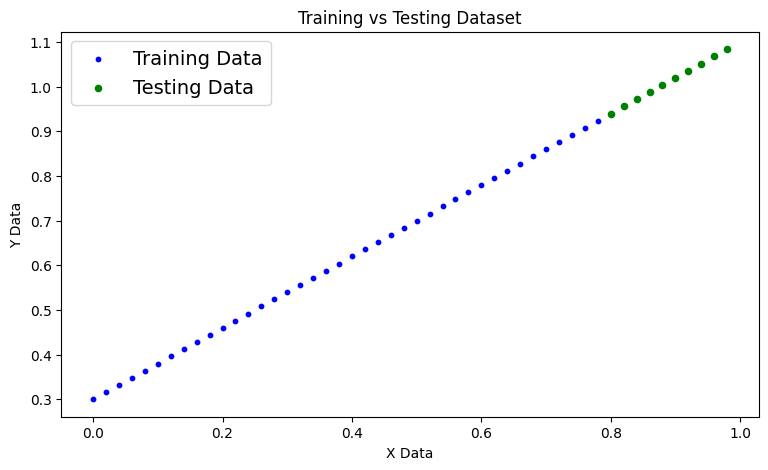

In [832]:
# Plotting the train_data and test_data
plot_prediction(X_train, y_train, X_test, y_test)

## 1.2 Creating the Pytorch Linear Model

In [833]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        # using the nn.Linear() for creating the model's paramters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [834]:
# Checking the model current device
next(model_1.parameters()).device

device(type='cpu')

In [835]:
#Setting the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [836]:
# Intializing the Loss Functiona and optmizers for model
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [837]:
# Training the model now
epochs = 200

# Put the data in device (data agnostic code)
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

epoch_count = []
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):
    
    model_1.train()
    
    # 1. Forward Pass
    y_pred_train = model_1(X_train)
    
    # 2. Calculating the loss
    train_loss = loss_fn(y_pred_train, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform the backpropagation
    train_loss.backward()
    
    # 5. Optmizer step
    optimizer.step()
    
    ## Testing the model
    model_1.eval()
    
    with torch.inference_mode():
        y_pred_test = model_1(X_test)
        
        test_loss = loss_fn(y_pred_test, y_test)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")
        
        epoch_count.append(epoch)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)


Epoch: 0 | Train Loss: 0.5161779522895813 | Test Loss: 0.484976202249527
Epoch: 10 | Train Loss: 0.400968074798584 | Test Loss: 0.35026636719703674
Epoch: 20 | Train Loss: 0.28575822710990906 | Test Loss: 0.2155565470457077
Epoch: 30 | Train Loss: 0.17054830491542816 | Test Loss: 0.08084668219089508
Epoch: 40 | Train Loss: 0.059164512902498245 | Test Loss: 0.04803137108683586
Epoch: 50 | Train Loss: 0.03966781124472618 | Test Loss: 0.08140596747398376
Epoch: 60 | Train Loss: 0.03567882254719734 | Test Loss: 0.0807427242398262
Epoch: 70 | Train Loss: 0.032199203968048096 | Test Loss: 0.07453083246946335
Epoch: 80 | Train Loss: 0.028760403394699097 | Test Loss: 0.06625828146934509
Epoch: 90 | Train Loss: 0.025327056646347046 | Test Loss: 0.058672625571489334
Epoch: 100 | Train Loss: 0.02189558744430542 | Test Loss: 0.05040008947253227
Epoch: 110 | Train Loss: 0.018456783145666122 | Test Loss: 0.04212753847241402
Epoch: 120 | Train Loss: 0.015025121159851551 | Test Loss: 0.034541901201009

In [838]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7941]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3090], device='cuda:0'))])

In [839]:
# Doing the prediction on the model for test data
model_1.eval()

with torch.inference_mode():
    y_test_pred = model_1(X_test)

y_test_pred = y_test_pred.cpu().numpy()

In [840]:
# Converting the train, test data and label from tensor on GPU to numpy at cpu

X_train = X_train.clone().detach().cpu().numpy()
y_train = y_train.clone().detach().cpu().numpy()

X_test = X_test.clone().detach().cpu().numpy()
y_test = y_test.clone().detach().cpu().numpy()
X_test

array([[0.8       ],
       [0.82      ],
       [0.84000003],
       [0.86      ],
       [0.88      ],
       [0.90000004],
       [0.92      ],
       [0.94      ],
       [0.96      ],
       [0.98      ]], dtype=float32)

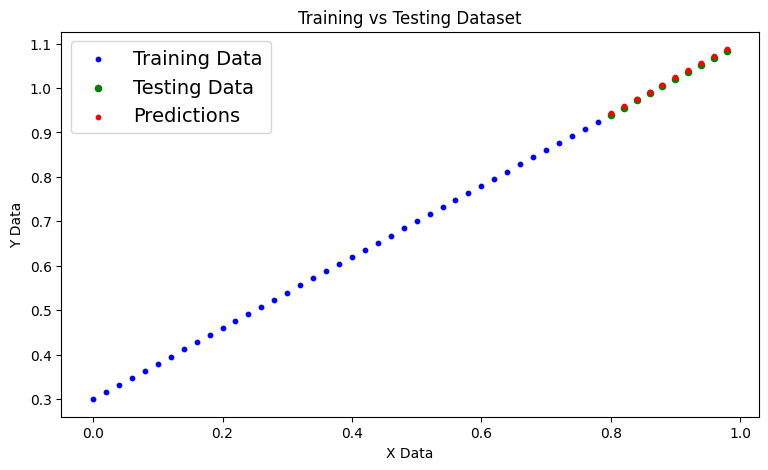

In [841]:
plot_prediction(train_data=X_train, train_labels=y_train, test_data=X_test, test_label=y_test, prediction=y_test_pred)

In [842]:
train_loss_list = np.array(torch.tensor(train_loss_list).numpy())
test_loss_list = np.array(torch.tensor(test_loss_list).numpy())

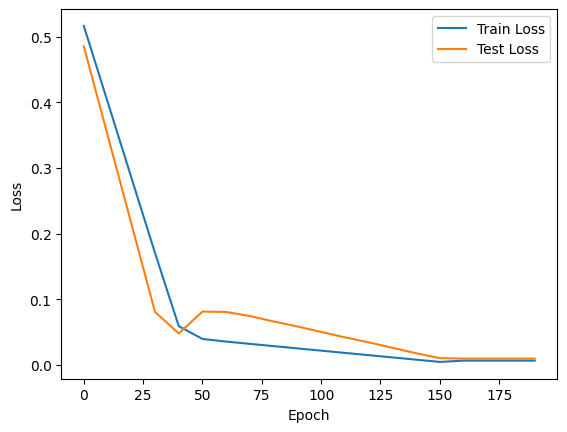

In [843]:
# Plotting the trainign and test curve for each epoch

plt.plot(epoch_count, train_loss_list, label="Train Loss")
plt.plot(epoch_count, test_loss_list, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [844]:
# Saving and Loading the Model
MODEL_NAME = "O2_pytorch_workflow_test_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Saving the model's state dict (Recommended by the Pytorch)
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to: models/O2_pytorch_workflow_test_model.pth


In [845]:
# Load the saved trained model
loaded_model_1 = LinearRegressionModelV2()
print(loaded_model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[-0.2343]])), ('linear_layer.bias', tensor([0.9186]))])


In [846]:
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7941]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3090], device='cuda:0'))])

In [850]:
# Testing the loaded model if the model is similar/equal to loaded model (model_1)
X_test = torch.tensor(X_test).to(device)
y_test_pred = torch.tensor(y_test_pred).to(device)

loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_y_preds_1 = loaded_model_1(X_test)

loaded_model_y_preds_1 == y_test_pred

/tmp/ipykernel_9257/2324552893.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).to(device)
/tmp/ipykernel_9257/2324552893.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_pred = torch.tensor(y_test_pred).to(device)


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

/tmp/ipykernel_9257/838895043.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_prediction(train_data=X_train, train_labels=y_train, test_data=np.array(torch.tensor(X_test).cpu().numpy()), test_label=y_test, prediction=np.array(torch.tensor(loaded_model_y_preds_1).cpu().numpy()))


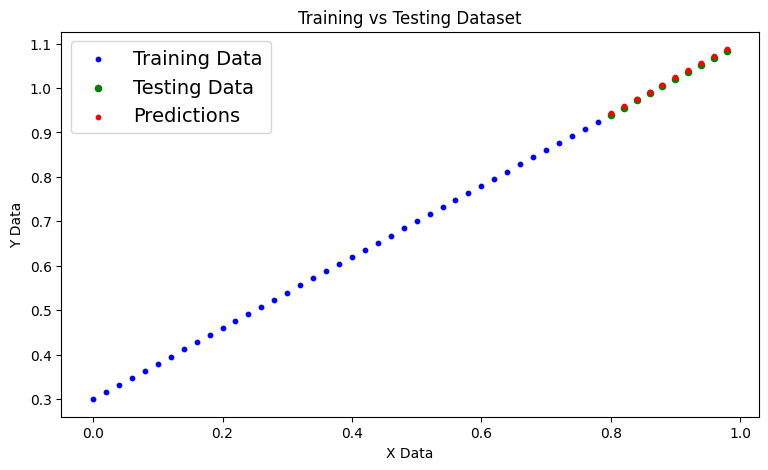

In [853]:
plot_prediction(train_data=X_train, train_labels=y_train, test_data=np.array(torch.tensor(X_test).cpu().numpy()), test_label=y_test, prediction=np.array(torch.tensor(loaded_model_y_preds_1).cpu().numpy()))